In [ ]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
raw_dataset.isnull().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
median=raw_dataset['Horsepower'].median()
raw_dataset['Horsepower']=raw_dataset['Horsepower'].fillna(median)

In [ ]:
raw_dataset['Origin']

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 398, dtype: int64

In [ ]:
raw_dataset = pd.get_dummies(raw_dataset, columns=['Origin'], prefix='', prefix_sep='')

In [ ]:
raw_dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', '1', '2', '3'],
      dtype='object')

In [ ]:
raw_dataset.head(100)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,1,2,3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
95,12.0,8,455.0,225.0,4951.0,11.0,73,1,0,0
96,13.0,8,360.0,175.0,3821.0,11.0,73,1,0,0
97,18.0,6,225.0,105.0,3121.0,16.5,73,1,0,0
98,16.0,6,250.0,100.0,3278.0,18.0,73,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


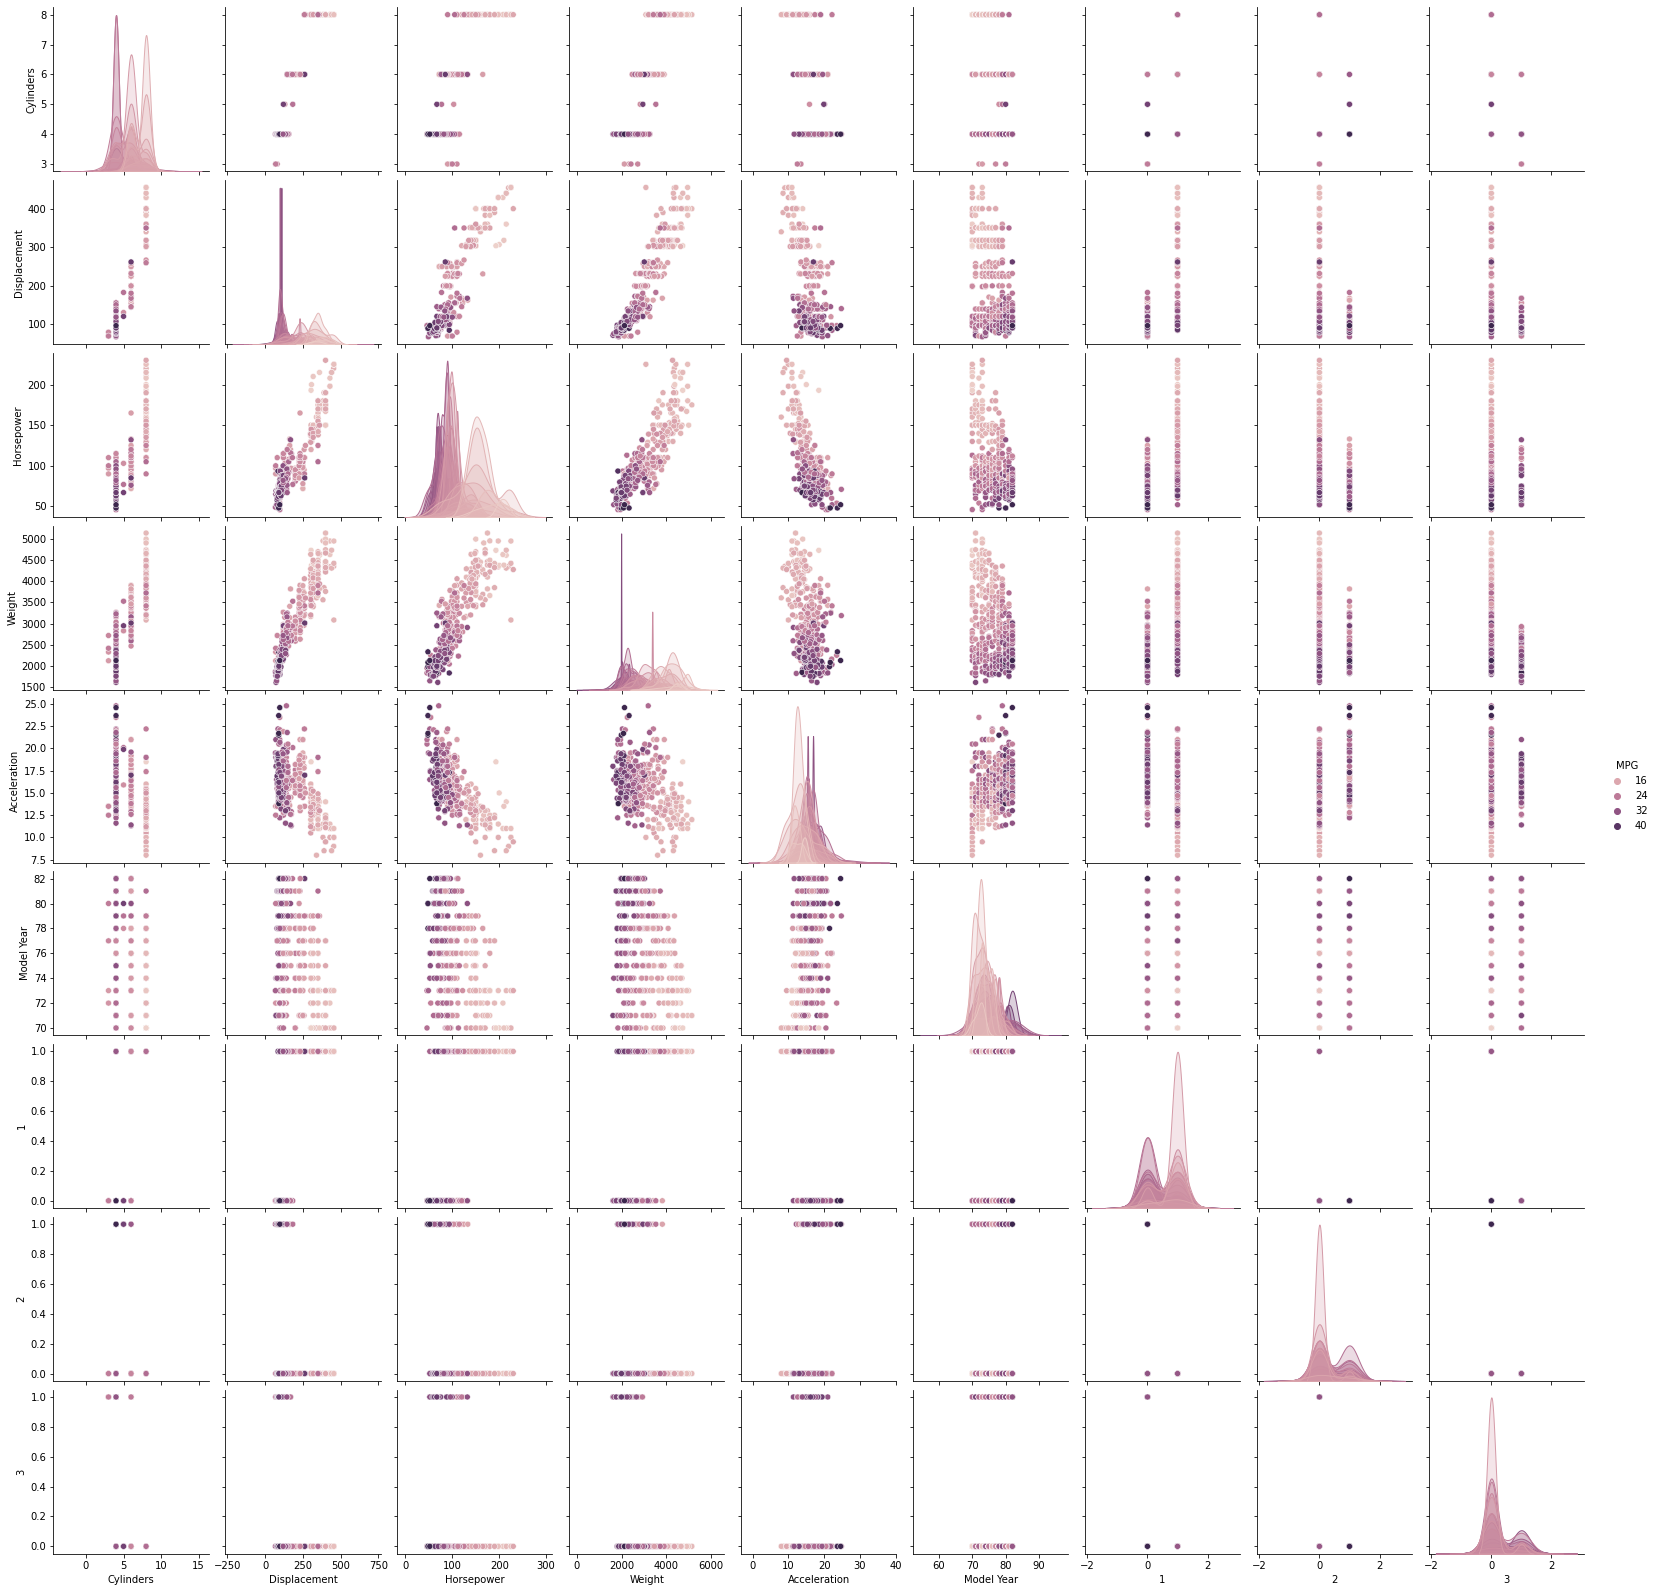

In [ ]:
import seaborn as sns
sns.pairplot(raw_dataset,"MPG")

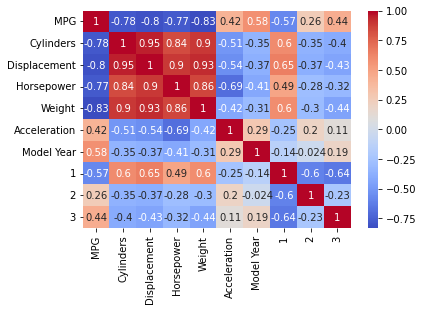

In [ ]:
corr=raw_dataset.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)

In [ ]:

categorical_features=[feature for feature in raw_dataset if raw_dataset[feature].dtype=='!O']
for feature in categorical_features:
    temp=raw_dataset.groupby(feature)['MPG'].count()/len(raw_dataset)
    temp_df=temp[temp>0.01].index
    raw_dataset[feature]=np.where(raw_dataset[feature].isin(temp_df),raw_dataset[feature],'Rare_v')

In [ ]:
import numpy as np
for f in categorical_features:
    if raw_dataset[f]=='Rare_v':
        print('feature{}'.format(f))

In [ ]:
categorical_features

[]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
sc2=MinMaxScaler(feature_range=(0,1))
scaled_trainy=sc.fit_transform(raw_dataset.MPG.values.reshape(-1,1))
blrt=raw_dataset.drop('MPG',axis=1)
scaled_trainX=sc2.fit_transform(blrt)

In [ ]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,1,2,3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(scaled_trainX,scaled_trainy,test_size=0.75,random_state=0)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support()
selected_feat = raw_dataset.drop('MPG',axis=1).columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print(selected_feat)

total features: 9
selected features: 5
Index(['Cylinders', 'Weight', 'Model Year', '1', '3'], dtype='object')


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
def mse(y_true,y_pred):
    print("Tracing loss mse")
    return tf.reduce_mean(tf.square(y_pred-y_true))

In [ ]:
class MyMomentumOptimizer(keras.optimizers.Optimizer):
    def __init__(self,learning_rate=0.001, momentum=0.9,name="MyMomentumOptimizer",**kwargs):
        super().__init__(name,**kwargs)
        self._set_hyper("learning_rate",kwargs.get("lr",learning_rate))
        self._set_hyper("decay",self._initial_decay)
        self._set_hyper("momentum",momentum)

    def _create_slots(self,var_list):
        for var in var_list:
            self.add_slot(var,"momentum")

    @tf.function
    def _resource_apply_dense(self,grad, var):
        var_dtype=var.dtype.base_dtype
        lr_t=self._decayed_lr(var_dtype)
        momentum_var=self.get_slot(var,"momentum")
        momentum_hyper=self._get_hyper("momentum",var_dtype)
        momentum_var.assign(momentum_var*momentum_hyper -(1.- momentum_hyper)*grad)
        var.assign_add(momentum_var*lr_t)

    def _resource_apply_spase(self,grad,var):
        raise NotImplementedError
    def get_config(self):
        base_config=super().get_config()
        return{
            
            **base_config,
            "learning_rate" : self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }

In [ ]:
class MyModel(keras.models.Model):
    def __init__(self,inputlen,**kwargs):
        super().__init__(**kwargs)
        self.inputlen=inputlen
        self.linear1=keras.layers.Dense(self.inputlen, kernel_regularizer=tf.keras.regularizers.l2(1e-3))
        self.linear2 =keras.layers.Dense(1000)
        self.linear3=keras.layers.Dense(1)
    def call(self,input):
        x=self.linear1(input)
        x=self.linear2(x)
        x=self.linear3(x)
        return x

In [ ]:
model=MyModel(len(raw_dataset['Displacement']))

In [ ]:
model.compile(loss=mse,optimizer=MyMomentumOptimizer())

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/5
Tracing loss mse
Tracing loss mse
4/4 [==============================] - 2s 12ms/step - loss: 0.3359
Epoch 2/5
4/4 [==============================] - 0s 9ms/step - loss: 0.3156
Epoch 3/5
4/4 [==============================] - 0s 9ms/step - loss: 0.2827
Epoch 4/5
4/4 [==============================] - 0s 10ms/step - loss: 0.2449
Epoch 5/5
4/4 [==============================] - 0s 9ms/step - loss: 0.2065


In [ ]:
@tf.custom_gradient
def my_better_soft(z):
    exp=tf.exp(z)
    def my_soft_plus_gradients(grad):
        return grad/ 1)(1+ 1/exp)
    return tf.math.log( exp+1),my_soft_plus_gradients
def my_soft_plus_gradients(z):
    return tf.where( z> 30., z, tf.math.log(tf.exp(z)+1))

In [ ]:
class MyDense(keras.layers.Layer):
    def __init__(self,units,activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units=units
        self.activation=keras.activations.get(activation)
    def build(self,batch_input_shape):
        self.kernel=self.add_weight(name="kernel",shape=[batch_input_shape[-1],self.units],intializer="glorot_normal")
        self.bias=self.add_weight(name="bias",shape=[self.units],initializer="zeros")
        super().build(batch_input_size)

    def call(self,X):
        return self.activation(X @ self.kernel +self.bias)
    def compute_output_shape(self,batch_input_size):
        return tf.TensorShape(batch_input_shape.as_list()[:-1]+[self.units])
    def get_config(self):
        base_config=super().get_config()
        return{**base_config,
               "units": self.units,
               " activation": keras.activations.serialize(self.activation)
        }
        

In [ ]:
keras.backend.clear_session()

In [ ]:
def Multiclasslayer(self):

In [ ]:
!pip install gpytorch

     |████████████████████████████████| 310 kB 7.3 MB/s 
  Created wheel for gpytorch: filename=gpytorch-1.6.0-py2.py3-none-any.whl size=509889 sha256=89757992c1aa80180674dc9e00965d673cd141a089537e54a95dbaa8a9c2bb0b
  Stored in directory: /root/.cache/pip/wheels/66/b5/89/34c06ad393a6feb72b4cdde46d0f1c667f3e2632960f9df109
Successfully built gpytorch


In [ ]:
import torch
import gpytorch
import math
import matplotlib.pyplot as plt


In [ ]:
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x,train_y,likelihood):
        super(ExactGPModel,self).__init__(train_x,train_y,likelihood)
        self.mean_module=gpytorch.means.ConstantMean()
        self.covar_module=gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self,x):
        mean_x=self.mean_module(x)
        covar_x=self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x,covar_x)


In [ ]:
X_train=torch.tensor(X_train)
y_train=torch.tensor(y_train)
train_x = torch.linspace(0, 1, 4)
# True function is sin(2*pi*x) with Gaussian noise
train_y = torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * 0.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [ ]:
likelihood=gpytorch.likelihoods.GaussianLikelihood()
model=ExactGPModel(train_x,train_y,likelihood)
model.train()
likelihood.train()

optimizer=torch.optim.Adam(model.parameters(),lr=0.1)

mll=gpytorch.mlls.ExactMarginalLogLikelihood(likelihood,model)
iterations=1000
for i in range(iterations):
    optimizer.zero_grad()
    output=model(train_x)
    loss=-mll(output,train_y)
    loss.backward()
    #print("iter{}, loss{}, length{}, noise{}".format(i+1,i**2,loss.item(),model.covar_module.base_kernel.lengthscale.item(),model.likelihood.noise.item()))
    optimizer.step()

In [ ]:
test_x = torch.linspace(0, 1, 101).unsqueeze(-1)
test_y = torch.sin(test_x * (2 * math.pi))


In [ ]:
likelihood.eval()
model.eval()
output=model(test_x)

In [ ]:
class LDA:
    

MultivariateNormal(loc: torch.Size([101]))


In [ ]:
?auto.arima 

Object `auto.arima` not found.
